## matplotlibによるjpegファイル読み込みのメモ
  
###  ①jpegファイルの表示

 まずドキュメントの[チュートリアル](https://matplotlib.org/3.2.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py")にある方法をでファイルをプロット

使用するmatplotlibのメソッド<br>
[matplotlib.image.imread()](https://matplotlib.org/3.2.1/api/image_api.html#matplotlib.image.imread) <br>
[matplotlib.pyplot.imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)

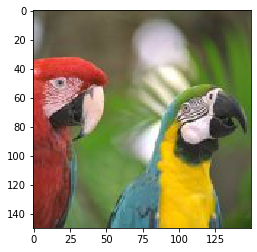

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f_name="target_data\.jpg" #jpegファイル名


img = mpimg.imread(f_name) #jpegファイルの読み込み

imgplot = plt.imshow(img)  #jpegファイルの描画


<h3>②読み込んだimgの確認</h3>
<p>numpyの<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray">ndarray</a>クラスの模様、またデータは150×150 pixel のRGB3色データ(画素は0～256の整数型(unit8))の模様</p>

In [2]:
type(img)

numpy.ndarray

In [3]:
img.shape

(150, 150, 3)

In [4]:
img.dtype

dtype('uint8')

In [5]:
img.size,150*150*3

(67500, 67500)

<h3>③imgplotの確認</h3>

In [6]:
type(imgplot)

matplotlib.image.AxesImage

In [7]:
dir(imgplot)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_axes',
 '_check_unsampled_image',
 '_clipon',
 '_clippath',
 '_contains',
 '_draw_unsampled_image',
 '_extent',
 '_filternorm',
 '_filterrad',
 '_get_clipping_extent_bbox',
 '_gid',
 '_imcache',
 '_in_layout',
 '_interpolation',
 '_label',
 '_make_image',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_resample',
 '_rgbacache',
 '_set_gc_clip',
 '_sketch',
 '_snap',
 '_stale',
 '_sticky_edges',
 '_transform',
 '_transformSet',
 '_url',
 '_visible',
 'add_callback',
 'add_checker

In [8]:
type(imgplot.axes)

matplotlib.axes._subplots.AxesSubplot

In [9]:
dir(imgplot.axes)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

<p>調べた結果
imgplotは<a href="https://matplotlib.org/3.2.1/api/image_api.html#matplotlib.image.AxesImage">matplotlib.image.AxesImage</a>クラスでそのアトリビュートにaxesがあり、

その型を調べるとmatplotlib.axes._subplots.AxesSubplotクラスでアトリビュートを見る限りおそらく<a href="https://matplotlib.org/3.2.1/api/axes_api.html#the-axes-class">matplotlib.axes</a>の近縁のようでaxexクラスのメソッドが有効そうなのでとりあえずset_xtick(),set_ytick()メソッドで目盛を外してみる。(引数としてからのリスト<a>[]</a>を渡す)</p>

[]

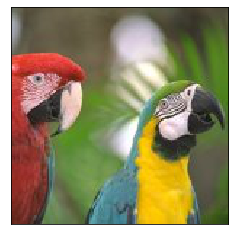

In [10]:
imgplot = plt.imshow(img)
imgplot.axes.set_xticks([]) #x軸の目盛を削除
imgplot.axes.set_yticks([]) #y軸の目盛を削除

### ④グレイスケールとRGBの分離とマルチプロット

まず画素のRGB各RGBのみを取り出す。<br>
<a href= "https://matplotlib.org/3.2.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py">チュートリアル</a>のやり方を参考にすると各色一行のコードで記述可能。(おをらくnumpyの機能)

チュートリアル曰く画素がRGB(またはRGBA)の場合0-255整数(uint8)か0-1の少数(float32)をサポートするが、グレイスケールの場合float32型の値のみのサポートとのこなのでとりあえず\[0:1\]にスケーリング

※チュートリアルではグレースケールと言っているが厳密には単色画素もしくは<a href= "https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow">imshow()</a>のリファランスの言葉を借りてscalar dataというのが妥当そう。

RGBの画素の平均値をとってgscale_imgとする。これはnumpy.ndarayの<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html#numpy.ndarray.mean">mean()</a>メソッドで簡単にできる。
ついでに\[0:1\]にスケーリング。<br>
また後述の理由により反転

In [11]:
red_img   = img[:,:,0] /255.  #R値の取り出し及び[0:256](uint8) →[0:1](float)のスケーリング
green_img = img[:,:,1] /255.  #G値の取り出し及び[0:256](uint8) →[0:1](float)のスケーリング
blue_img  = img[:,:,2] /255.  #B値の取り出し及び[0:256](uint8) →[0:1](float)のスケーリング

gscale_img = 1. - img.mean(2)/255. #RGBの平均値取得[0:256](uint8) →[0:1](float)のスケーリング、反転

マルチプロットするための<a href ="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots">matlibplo.pyplot.subplots()</a>で生成されたAxesオブジェクト(以下ではaxs[][])にも<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow">ishow()</a>メソッドがあり、リファランスを見る限りでは<a href= "https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow" >matplotlib.pyplot.imshow()</a>と内容は同じそうなのでaxs[i][j].imshow()で作った各データのマルチプロットでの描画を試してみる。

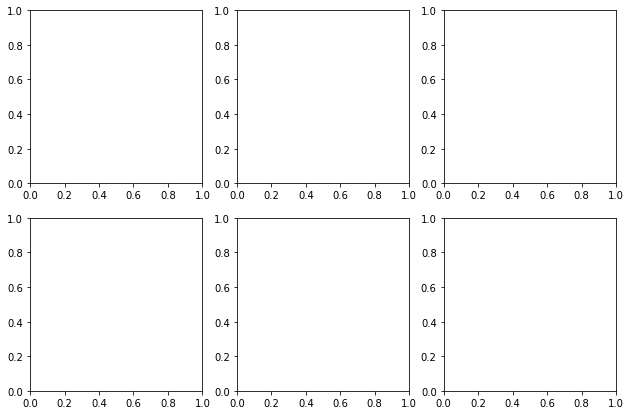

In [12]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.])   #2x3のマルチっプロットの作成


In [13]:
type(axs[0][0])

matplotlib.axes._subplots.AxesSubplot

In [14]:
dir(axs[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

ここで<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow">iｍshow()</a>の引数cmapは単色画像(scalor data)を表示する場合のカラーマップを指定するもので、この<a href="https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html">リンク</a>先が詳しい

RGB各職に対応したグラデーションパターン"Reds","Greens","Blues"もあり各色の表示にはそれを使う、ただし、グレースケールも"Greys"としてあるが先ほどRGBの平均値を使う場合は注意が必要、RGBは光の三原色なので平均値をとると輝度値(0が黒で1が白)になる、一方"Greys"は値が大きくなるにつれて白→黒となるパターンとなる。これが先ほどグレースケールで反転を使った理由。<br>
※後述の通り厳密にはRGBの平均は輝度ではない、、、

Text(0.5, 1.0, 'Blue')

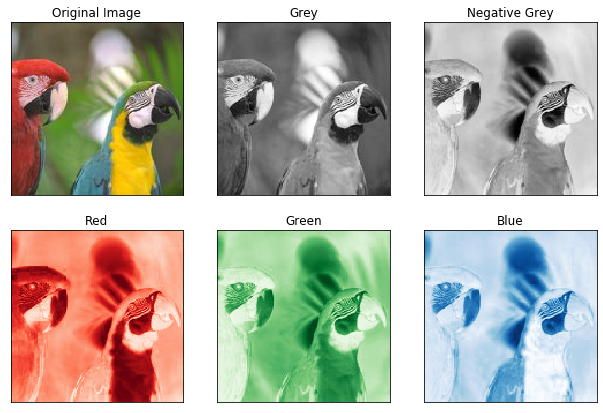

In [15]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.])   #2x3のマルチっプロットの作成


axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys")
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey")

axs[0][2].imshow(1.-gscale_img,cmap="Greys")    #グレースケールの反転
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey")

axs[1][0].imshow(red_img,cmap="Reds")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Red")

axs[1][1].imshow(green_img,cmap="Greens")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Green")

axs[1][2].imshow(blue_img,cmap="Blues")
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Blue")


作った単色画質にたいして色々演算などをやっていても思い通りに描画できないので調べてみると、<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow">imshow()</a>メソッドでは単色スケールの表示はデフォルトでは画素値の最大値=>1、最小値=>0となるようにオートスケールさおり、そのスケールを固定するためにはimshow()のNormパラメータで設定可能とのこと。

Normパラメータは<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize"></a>matplotlib.colors.Normalizeクラスを渡す必要があり、matplotlib.colorsモジュールをmcolとしてインポートしてnormalize_fixというインスタンス(0～1に固定の意味、、)を作ってみた。
以上によりオートスケールの無効化を試してみる。<br>
(おそらくカラーバー表示のグラフとかでも同様の手法が応用できると思われる。)<br>

出力の下段の通り画素値を半分にしたときオートスケール有効だと元の画像と変わらないがオートスケールを無効にすると薄く表示される。


Text(0.5, 1.0, 'Grey/2.0 without Autoscale')

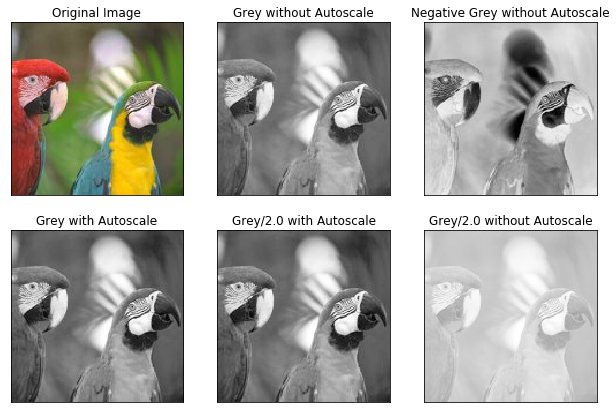

In [16]:
import matplotlib.colors as mpcol

normalize_fix=mpcol.Normalize(0,1)

fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",norm=normalize_fix)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey without Autoscale")

axs[0][2].imshow(1.-gscale_img,cmap="Greys",norm=normalize_fix)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey without Autoscale")

axs[1][0].imshow(gscale_img,cmap="Greys")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey with Autoscale")

axs[1][1].imshow(gscale_img/2.,cmap="Greys")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey/2.0 with Autoscale")

axs[1][2].imshow(gscale_img/2.,cmap="Greys",norm=normalize_fix)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey/2.0 without Autoscale")


<p><a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow">imshow()</a>の説明をよく読むと直接引数としてvmin,vmaxを指定できそうなのでその方法も試してみる。こっちのほうが簡単</p>

Text(0.5, 1.0, 'Grey/2.0 without Autoscale')

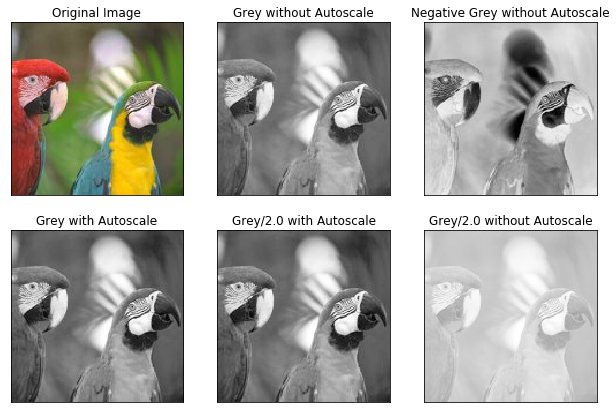

In [17]:

fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey without Autoscale")

axs[0][2].imshow(1.-gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Negative Grey without Autoscale")

axs[1][0].imshow(gscale_img,cmap="Greys")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey with Autoscale")

axs[1][1].imshow(gscale_img/2.,cmap="Greys")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey/2.0 with Autoscale")

axs[1][2].imshow(gscale_img/2.,cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey/2.0 without Autoscale")


調子に乗ってvmin,vmaxをいろいろいじってみる<br>
当然vmin<vmaxでないとエラーが出る。

Text(0.5, 1.0, 'Grey  vmin=0,vmax=0.5')

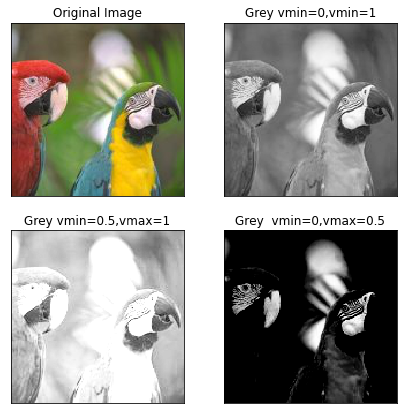

In [18]:
fig, axs = plt.subplots(2, 2,figsize=[7.,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey vmin=0,vmin=1")

axs[1][0].imshow(gscale_img,cmap="Greys",vmin=0.5,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey vmin=0.5,vmax=1")

axs[1][1].imshow(gscale_img,cmap="Greys",vmin=0.0,vmax=0.5)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Grey  vmin=0,vmax=0.5")

ここまではRGBの平均で輝度を算出していたが、厳密には輝度値人間の目のRGBの各感度に考慮した以下のYCbCr系に変換したY値が浮かわれる。YCbCrを算出する。(ITU-R BT.601)


輝度：Y = 0.29900×R + 0.58700×G + 0.11400×B<br>
色差(b)：Cb = −0.16874×R − 0.33126×G + 0.50000×B<br>
色差(r)：Cr = 0.50000×R − 0.41869×G − 0.081×B


因みに逆変換は以下

R = Y + 1.40200×Cr<br>
G = Y − 0.34414×Cb − 0.71414×Cr<br>
B = Y + 1.77200×Cb


In [20]:
Y_img = 0.29900*red_img + 0.58700*green_img + 0.11400*blue_img
Cb_img = -0.1687*red_img  - 0.33126*green_img + 0.50000*blue_img
Cr_img = 0.50000*red_img  - 0.41869*green_img - 0.081*blue_img

変換した輝度Yと先ほどのRGB平均値で算出した輝度らしきものをプロットする。

ついでにCb,Crもプロットしているが負もとるので0.5オフセットしている。


Text(0.5, 1.0, 'Negative Grey Scale from Y (zoom up)p')

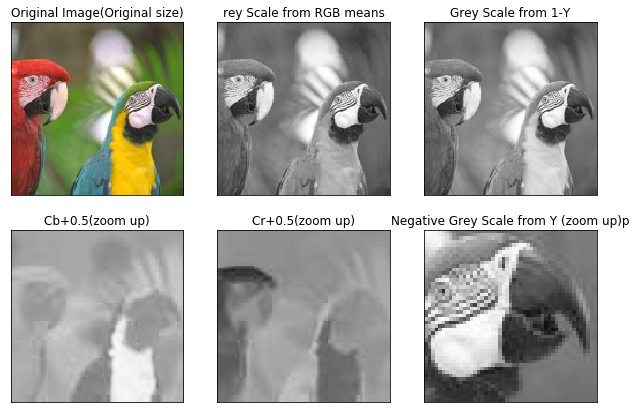

In [31]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey Scale from RGB means")

axs[0][2].imshow(1-Y_img,cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from 1-Y")

axs[1][0].imshow(Cb_img+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up)")

axs[1][1].imshow(Cr_img+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up)")

axs[1][2].imshow(1-Y_img[50:99,100:149],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Negative Grey Scale from Y (zoom up)p")

目立った違いとしてはRGBの平均値に対してオリジナルの黄色い箇所がY輝度のほうが目立って明るくなっていることがわかる。<br>
これは黄色がYCbCr変換時の比重の大きいRed,Greenの工合であることに起因するものと菅家られる。<br>
ほかの部分は目視では目立った違いは見受けられず。


どの程度差があるのかを引き算して確認してみる<br>
差分値こちらも負数がありうるが小さい値になることが予測されるためvmin=-0.3,vmax=0.3とした<br>
この場ありNuetral Greyが差分なしで明るいとっころがY輝度のほうが大きな値、暗いところがY輝度のほうが小さな値となる。


Text(0.5, 1.0, 'RGB means - Y')

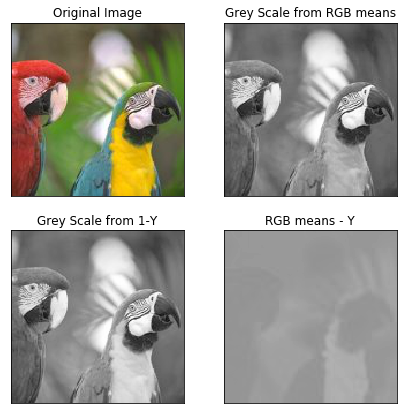

In [38]:
fig, axs = plt.subplots(2, 2,figsize=[7.,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image")

axs[0][1].imshow(gscale_img,cmap="Greys",vmin=0,vmax=1)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Grey Scale from RGB means")

axs[1][0].imshow(1-Y_img,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Grey Scale from 1-Y")

axs[1][1].imshow(1.-gscale_img-Y_img,cmap="Greys",vmin=-0.3,vmax=0.3)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("RGB means - Y")

代替目視と同じように原画の黄色部分で薄くなってる差分画像が得られた。

次は中段右側付近部分を拡大したものをプロットしてみる。

Text(0.5, 1.0, 'Grey Scale from Y (zoom up)p')

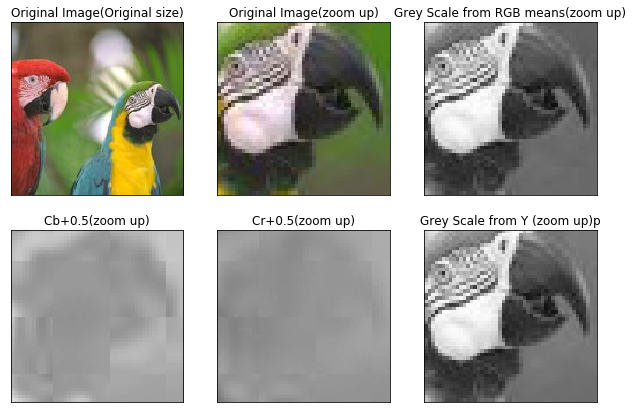

In [39]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(img[55:104,100:149,:])
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Original Image(zoom up)")

axs[0][2].imshow(gscale_img[55:104,100:149],cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from RGB means(zoom up)")

axs[1][0].imshow(Cb_img[55:104,100:149]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up)")

axs[1][1].imshow(Cr_img[55:104,100:149]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up)")

axs[1][2].imshow(1-Y_img[55:104,100:149],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey Scale from Y (zoom up)p")

興味深いことにCb,Crに関してはブロックノイズ(実は16x16)

Text(0.5, 1.0, 'Grey Scale from Y (zoom up)p')

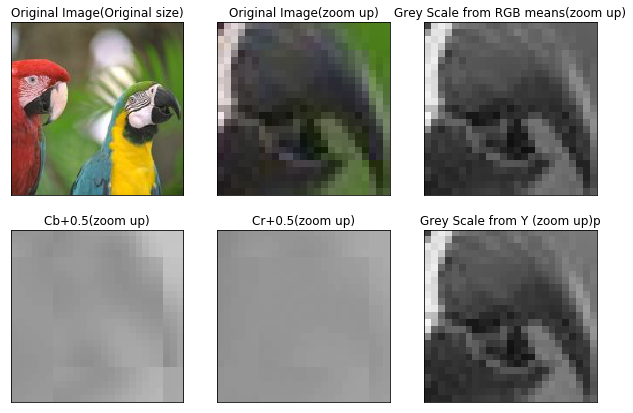

In [48]:
fig, axs = plt.subplots(2, 3,figsize=[10.5,7.]) 

axs[0][0].imshow(img)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].set_title("Original Image(Original size)")

axs[0][1].imshow(img[60:85,122:147,:])
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_title("Original Image(zoom up)")

axs[0][2].imshow(gscale_img[60:85,122:147],cmap="Greys",vmin=0,vmax=1)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title("Grey Scale from RGB means(zoom up)")

axs[1][0].imshow(Cb_img[60:85,122:147]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title("Cb+0.5(zoom up)")

axs[1][1].imshow(Cr_img[60:85,122:147]+0.5,cmap="Greys",vmin=0,vmax=1)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_title("Cr+0.5(zoom up)")

axs[1][2].imshow(1-Y_img[60:85,122:147],cmap="Greys",vmin=0,vmax=1)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title("Grey Scale from Y (zoom up)p")